In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/project/hfa_work/ENCODE/data/SQANTI_reports'

In [3]:
TISSUES = ['aorta', 'colon', 'brain', 'heart', 'lung', 'muscle']
TOOLS = ['flair', 'isoquant', 'isotools', 'stringtie']
tissue = 'aorta'
tool = 'isoquant'

In [4]:
df = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
df.head()

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,ENST00000003583.12,chr1,-,2544,8,full-splice_match,ENSG00000001460.18,ENST00000003583.12,2544.0,8.0,...,TATTGAGCTTTTGGGTACCC,-1.0,True,-23.0,True,ATTAAA,-16.0,True,NaN,201.000000
1,ENST00000037502.11,chr1,-,2100,3,full-splice_match,ENSG00000034971.17,ENST00000037502.11,2100.0,3.0,...,CGTTCTCTTCCTTGAACTTT,2311.0,False,-14.0,True,AATAAA,-15.0,True,NaN,2751.000000
2,ENST00000040877.2,chr1,-,5206,30,full-splice_match,ENSG00000059588.10,ENST00000040877.2,5206.0,30.0,...,TTTATTTCCTAGAAACGCCT,-1.0,True,-10.0,True,AATAAA,-24.0,True,NaN,NaN
3,ENST00000054666.11,chr1,+,2178,5,full-splice_match,ENSG00000049245.13,ENST00000054666.11,2178.0,5.0,...,TTGTGGCACCTGTGCTCCTT,0.0,True,32.0,True,AATAAA,-17.0,True,NaN,2527.237624
4,ENST00000060969.6,chr1,-,5494,5,full-splice_match,ENSG00000052723.12,ENST00000060969.6,5494.0,5.0,...,TCCTTGCTAATATTTTACTT,14.0,False,-24.0,True,AATAAA,-21.0,True,NaN,801.000000


In [5]:
df.columns

Index(['isoform', 'chrom', 'strand', 'length', 'exons', 'structural_category',
       'associated_gene', 'associated_transcript', 'ref_length', 'ref_exons',
       'diff_to_TSS', 'diff_to_TTS', 'diff_to_gene_TSS', 'diff_to_gene_TTS',
       'subcategory', 'RTS_stage', 'all_canonical', 'min_sample_cov',
       'min_cov', 'min_cov_pos', 'sd_cov', 'FL', 'n_indels', 'n_indels_junc',
       'bite', 'iso_exp', 'gene_exp', 'ratio_exp', 'FSM_class', 'coding',
       'ORF_length', 'CDS_length', 'CDS_start', 'CDS_end', 'CDS_genomic_start',
       'CDS_genomic_end', 'predicted_NMD', 'perc_A_downstream_TTS',
       'seq_A_downstream_TTS', 'dist_to_CAGE_peak', 'within_CAGE_peak',
       'dist_to_polyA_site', 'within_polyA_site', 'polyA_motif', 'polyA_dist',
       'polyA_motif_found', 'ORF_seq', 'ratio_TSS'],
      dtype='object')

In [6]:
classifications = {} if not 'classifications' in globals() else classifications

def get_classification(tissue, tool):
    if not tissue in classifications:
        classifications[tissue] = {}
    if not tool in classifications[tissue]:
        classifications[tissue][tool] = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
    return classifications[tissue][tool]

def get_ratio_tss(df, cutoff=1.5):
    return (df['ratio_TSS'] > cutoff).sum()

def get_binary_column(df, column):
    return df[column].sum()

In [7]:
metric_list = []

for tissue in TISSUES:
    for tool in TOOLS:
        df = get_classification(tissue, tool)
        count = df.shape[0]
        ratio_tss = get_ratio_tss(df)
        cage_support = get_binary_column(df, 'within_CAGE_peak')
        polyA_support = get_binary_column(df, 'within_polyA_site')
        polyA_motif = get_binary_column(df, 'polyA_motif_found')
        metric_list.append({
            'tissue': tissue,
            'tool': tool,
            'count': count,
            'ratio_TSS': ratio_tss,
            'CAGE_support': cage_support,
            'polyA_support': polyA_support,
            'polyA_motif': polyA_motif
        })

metric_df = pd.DataFrame(metric_list)

In [8]:
metric_df

,tissue,tool,count,ratio_TSS,CAGE_support,polyA_support,polyA_motif
0,aorta,flair,109926,33637,18925,42699,55271
1,aorta,isoquant,32914,15915,9629,21738,24711
2,aorta,isotools,45699,22330,11213,30577,32306
3,aorta,stringtie,280036,77485,38655,127021,155302
4,colon,flair,65429,34722,19760,43690,47626
5,colon,isoquant,31526,19690,11369,26200,26635
6,colon,isotools,39456,23746,12128,32703,33919
7,colon,stringtie,263461,82399,42584,127344,151567
8,brain,flair,145039,47911,27472,66832,77982
9,brain,isoquant,40664,24016,14546,33667,33849


# Barplots

Barplot for the number of isoforms for each tool and tissue

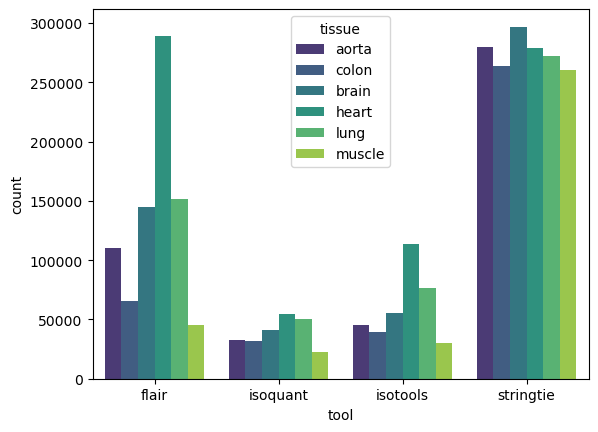

In [9]:
ax = sns.barplot(x='tool', y='count', hue='tissue', data=metric_df, palette='viridis')

# Heatmap

Generate a heatmap for CAGE support and TSS ratio with X=tissues and Y=tools.
One for all isoforms and then one for each structural_category.

In [10]:
def heatmap(df, column, header_suffix='', **params):
    df = df.copy()
    df.loc[:,'relative_metric'] = df[column] / df['count']
    df.loc[:,'annotation'] = df['relative_metric'].map('{:,.2f}'.format) + '\n(' + df['count'].astype(str) + ')'
    # Reshape the data using pivot
    heatmap_data = df.pivot(index='tool', columns='tissue', values='relative_metric')

    # Annotate each cell with the numeric value and the count
    annot = df.pivot(index='tool', columns='tissue', values='annotation')

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, vmin=0, vmax=1, annot=annot, fmt='', linewidths=0.5, **params)
    plt.title(f'Heatmap of {column}{header_suffix}')
    plt.xlabel('Tissue')
    plt.ylabel('Tool')
    plt.show()

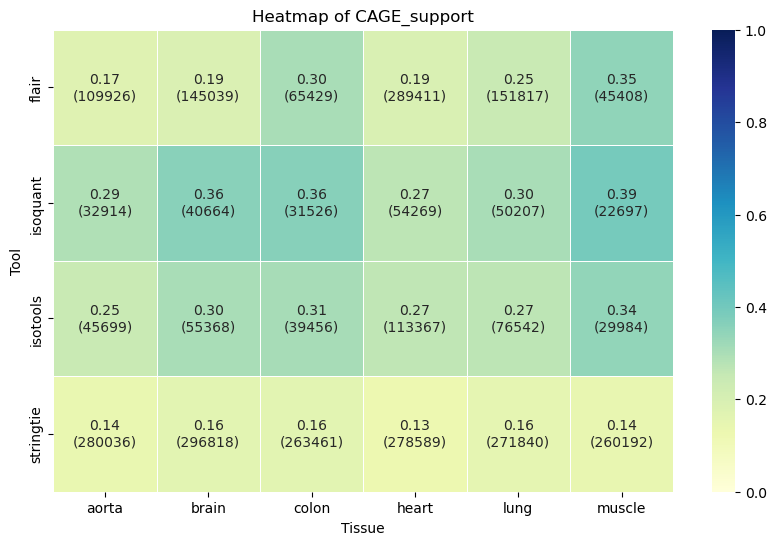

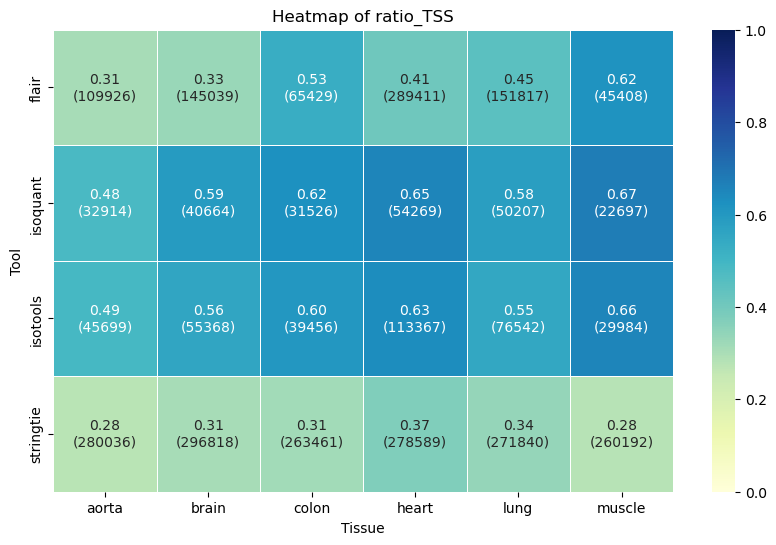

In [11]:
heatmap(metric_df, 'CAGE_support', cmap='YlGnBu')
heatmap(metric_df, 'ratio_TSS', cmap='YlGnBu')

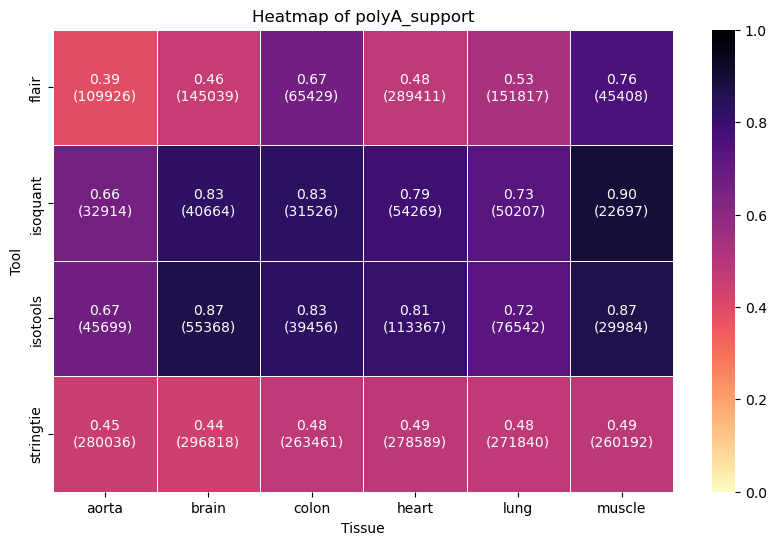

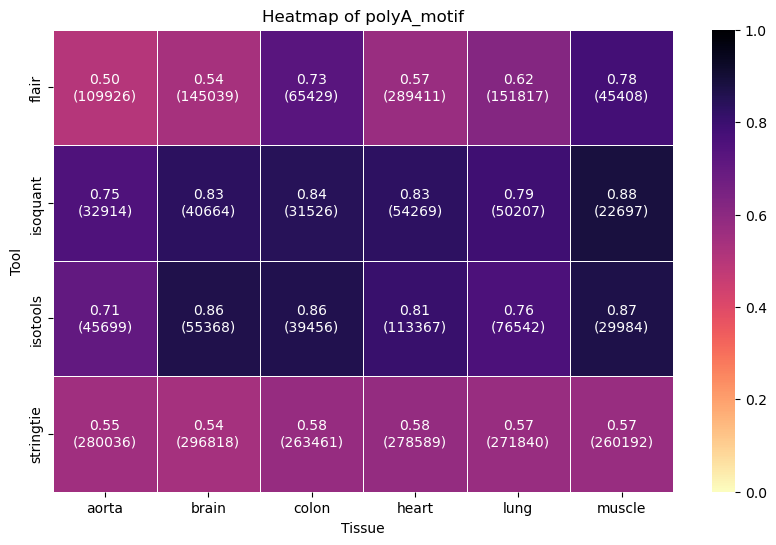

In [12]:
heatmap(metric_df, 'polyA_support', cmap='magma_r')
heatmap(metric_df, 'polyA_motif', cmap='magma_r')

In [13]:
metric_categories_list = []

for tissue in TISSUES:
    for tool in TOOLS:
        df = get_classification(tissue, tool)
        categories = df['structural_category'].value_counts()
        for category, count in categories.items():
            df_cat = df.loc[df['structural_category'] == category]
            ratio_tss = get_ratio_tss(df_cat)
            cage_support = get_binary_column(df_cat, 'within_CAGE_peak')
            polyA_support = get_binary_column(df_cat, 'within_polyA_site')
            polyA_motif = get_binary_column(df_cat, 'polyA_motif_found')
            metric_categories_list.append({
                'tissue': tissue,
                'tool': tool,
                'category': category,
                'count': count,
                'ratio_TSS': ratio_tss,
                'CAGE_support': cage_support,
                'polyA_support': polyA_support,
                'polyA_motif': polyA_motif
            })

metric_categories_df = pd.DataFrame(metric_categories_list)

In [14]:
metric_categories_df.loc[(metric_categories_df['tissue'] == 'aorta') & (metric_categories_df['tool'] == 'isoquant')]

,tissue,tool,category,count,ratio_TSS,CAGE_support,polyA_support,polyA_motif
9,aorta,isoquant,full-splice_match,19878,13168,8343,17969,17559
10,aorta,isoquant,genic_intron,5364,84,4,426,2331
11,aorta,isoquant,novel_in_catalog,1869,1081,559,1520,1586
12,aorta,isoquant,incomplete-splice_match,1706,796,380,747,1071
13,aorta,isoquant,antisense,1579,80,10,145,610
14,aorta,isoquant,genic,896,223,118,266,553
15,aorta,isoquant,intergenic,862,74,3,136,432
16,aorta,isoquant,novel_not_in_catalog,718,385,198,500,536
17,aorta,isoquant,fusion,42,24,14,29,33


In [15]:
non_fsm_df = metric_categories_df.loc[metric_categories_df['category'] != 'full-splice_match'].groupby(['tissue', 'tool']).sum().reset_index()
non_fsm_df


,tissue,tool,category,count,ratio_TSS,CAGE_support,polyA_support,polyA_motif
0,aorta,flair,genic_intronnovel_in_catalogantisenseincomplet...,88402,18735,9523,24521,37555
1,aorta,isoquant,genic_intronnovel_in_catalogincomplete-splice_...,13036,2747,1286,3769,7152
2,aorta,isotools,incomplete-splice_matchgenic_intronantisenseno...,20977,5341,2282,9622,11959
3,aorta,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,26296,4215,1934,5610,10923
4,brain,flair,genic_intronnovel_in_catalogantisenseintergeni...,116099,28759,15087,41089,52473
5,brain,isoquant,novel_in_catalognovel_not_in_catalogincomplete...,17149,8246,4516,12126,12735
6,brain,isotools,incomplete-splice_matchnovel_in_catalognovel_n...,21775,8629,4289,17784,17967
7,brain,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,43097,8127,4072,11341,16943
8,colon,flair,novel_in_cataloggenic_intronantisenseincomplet...,43106,17991,9565,23546,27711
9,colon,isoquant,novel_in_catalogincomplete-splice_matchgenic_i...,9380,4478,2138,5948,6927


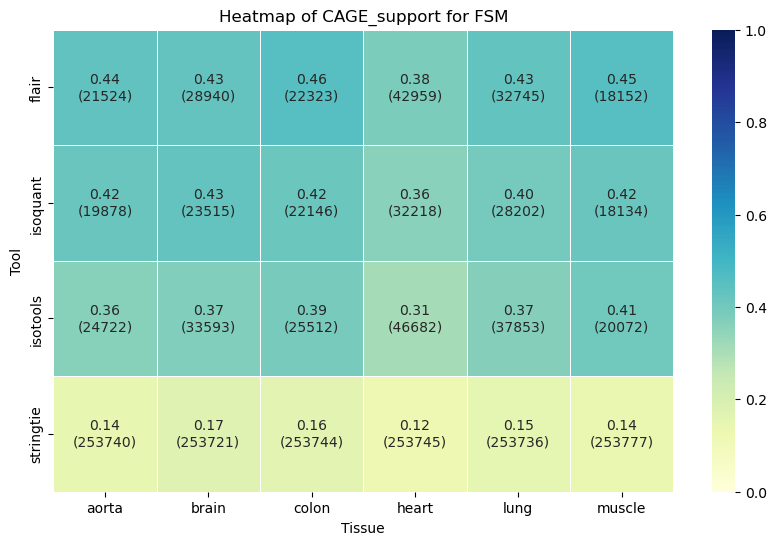

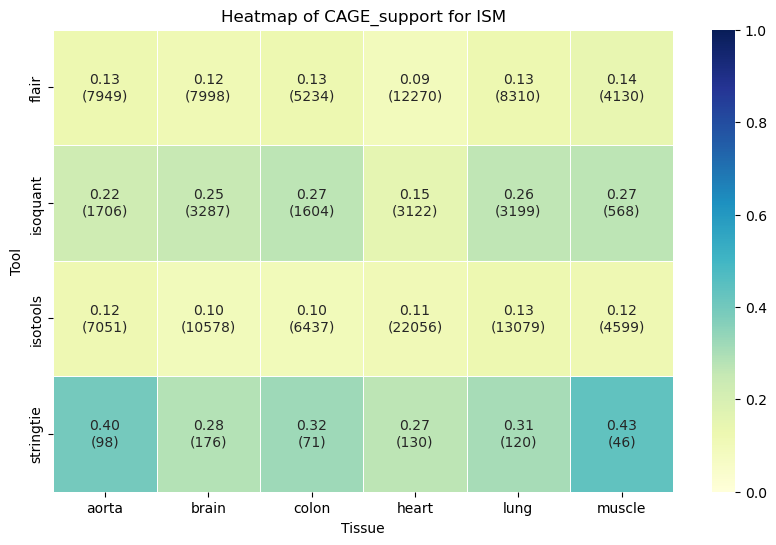

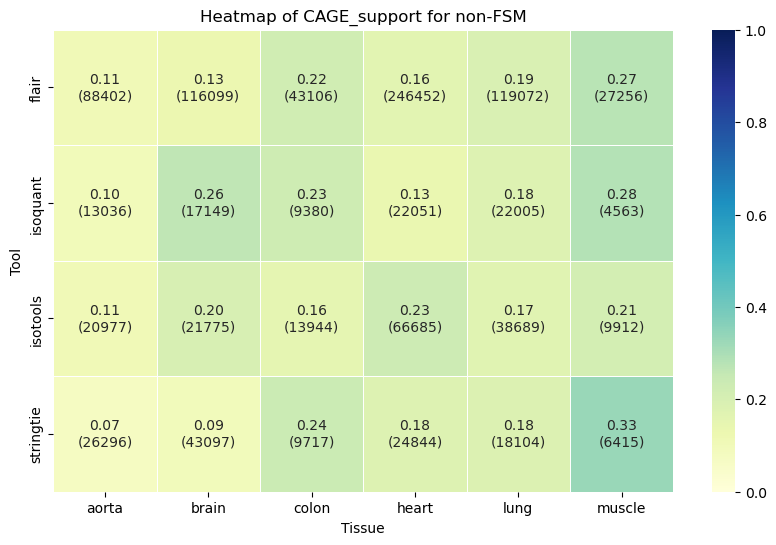

In [16]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'CAGE_support', ' for FSM', cmap='YlGnBu')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'CAGE_support', ' for ISM', cmap='YlGnBu')
heatmap(non_fsm_df, 'CAGE_support', ' for non-FSM', cmap='YlGnBu')

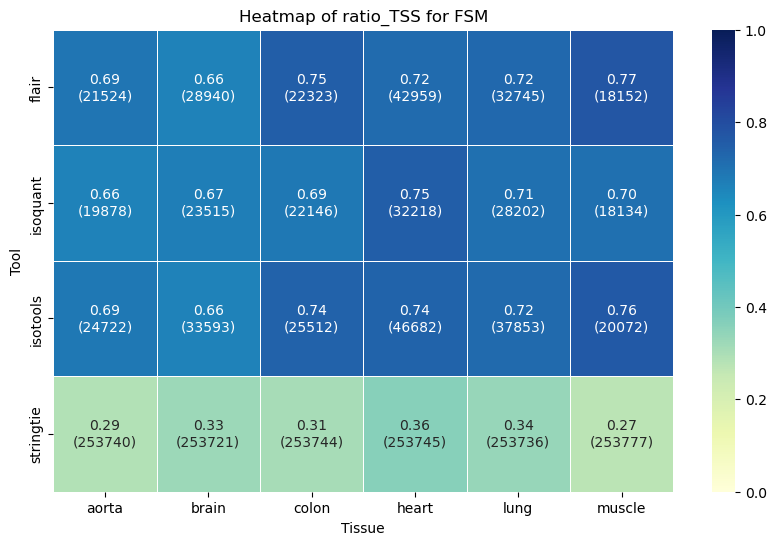

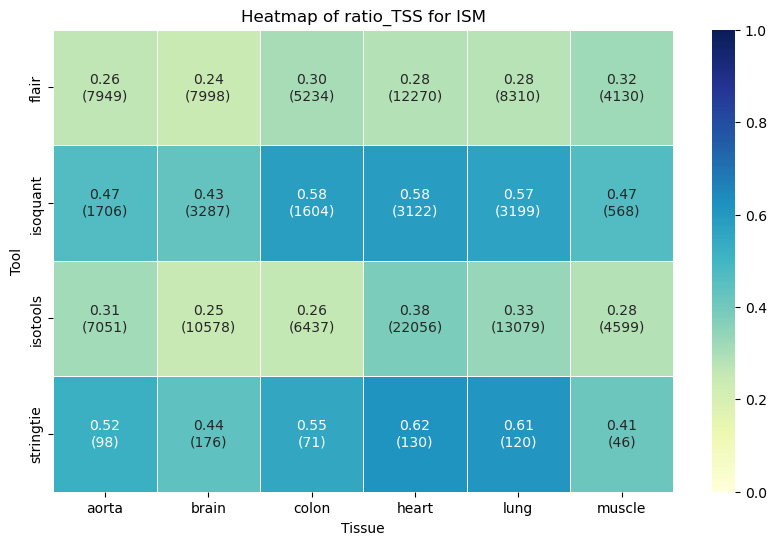

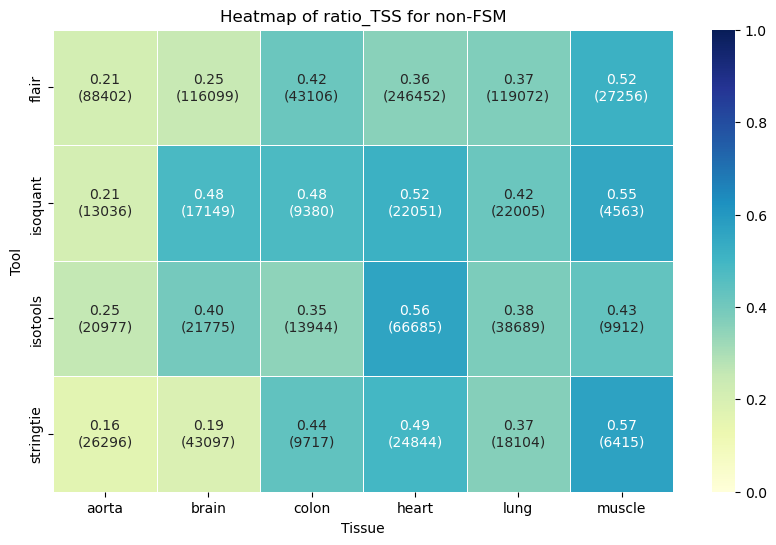

In [17]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'ratio_TSS', ' for FSM', cmap='YlGnBu')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'ratio_TSS', ' for ISM', cmap='YlGnBu')
heatmap(non_fsm_df, 'ratio_TSS', ' for non-FSM', cmap='YlGnBu')

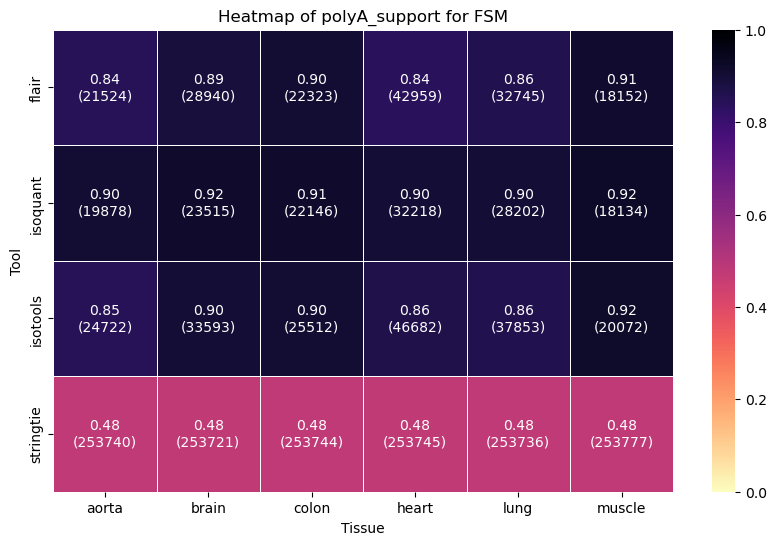

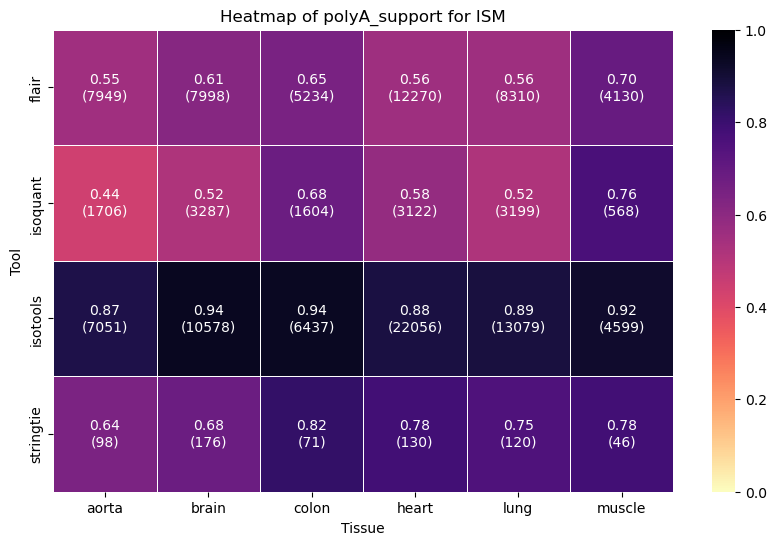

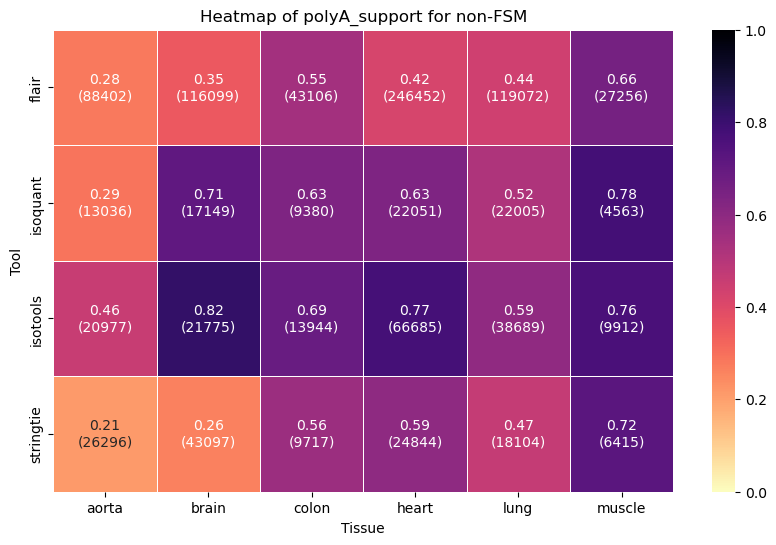

In [18]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'polyA_support', ' for FSM', cmap='magma_r')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'polyA_support', ' for ISM', cmap='magma_r')
heatmap(non_fsm_df, 'polyA_support', ' for non-FSM', cmap='magma_r')

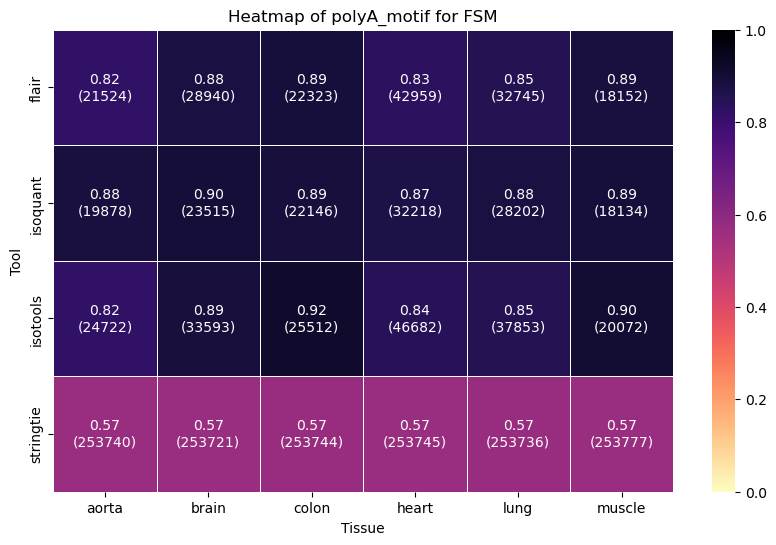

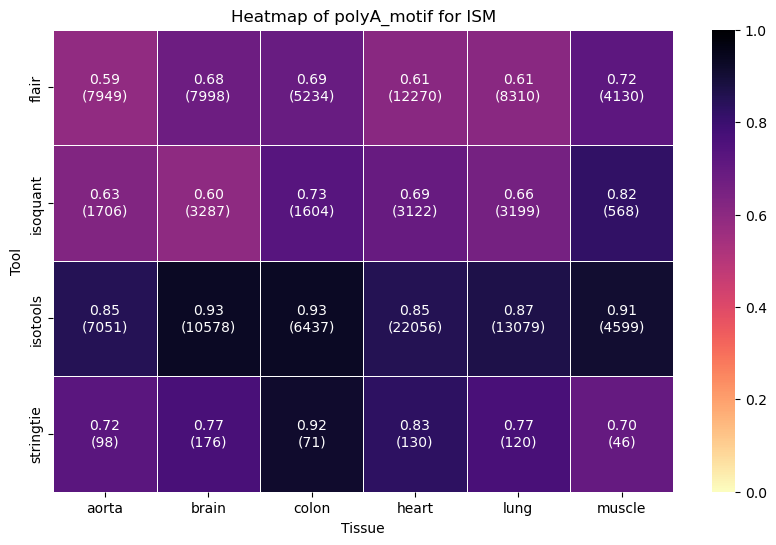

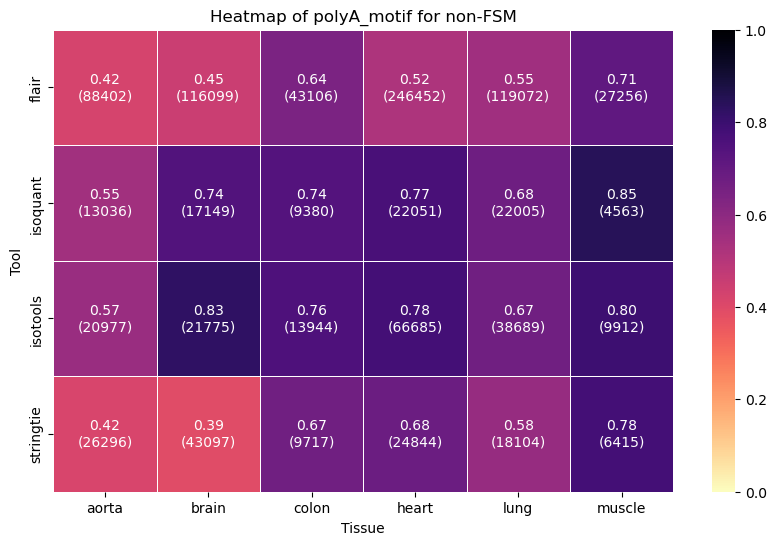

In [19]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'polyA_motif', ' for FSM', cmap='magma_r')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'polyA_motif', ' for ISM', cmap='magma_r')
heatmap(non_fsm_df, 'polyA_motif', ' for non-FSM', cmap='magma_r')

# Venn diagram

Overlap of isoforms between tools

In [20]:
import venn

In [21]:
# get position of all isoforms for each tool and tissue
def get_isoform_positions(tissue, tool):
    df = get_classification(tissue, tool)


/scratch/local/ipykernel_13027/3240546241.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


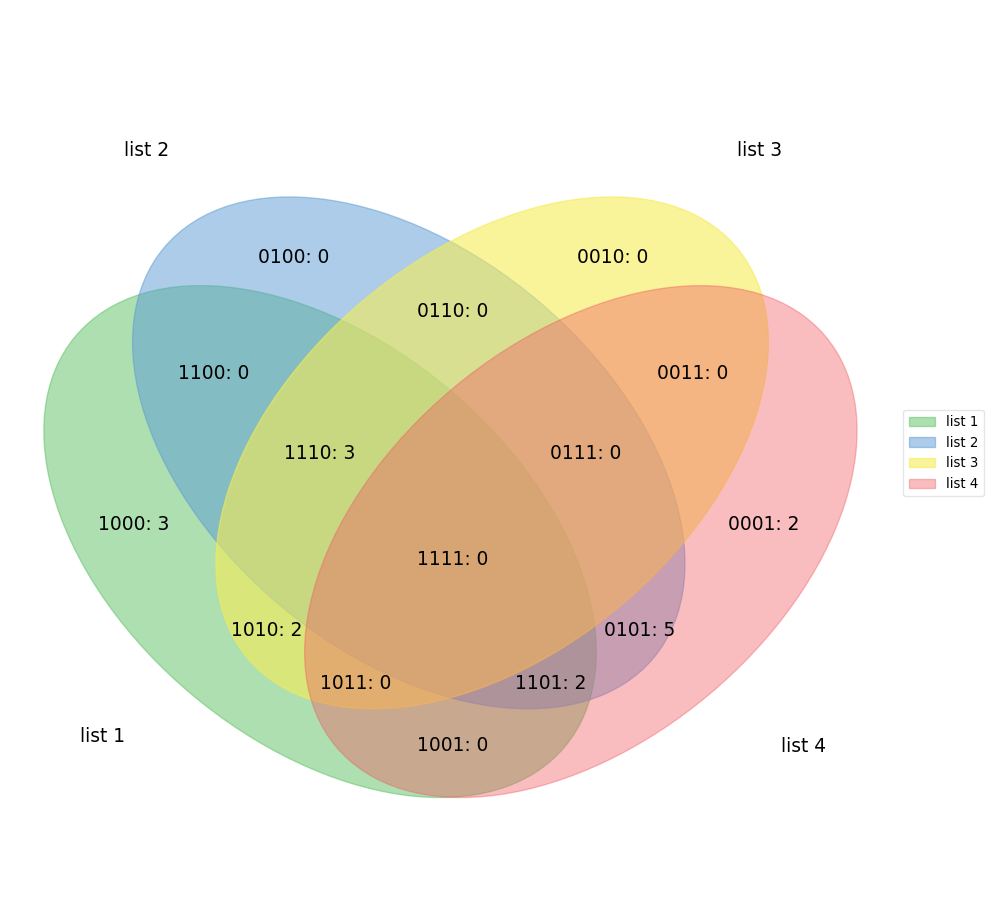

In [22]:
labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17)], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['list 1', 'list 2', 'list 3', 'list 4'])
fig.show()

/scratch/local/ipykernel_13027/484549091.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


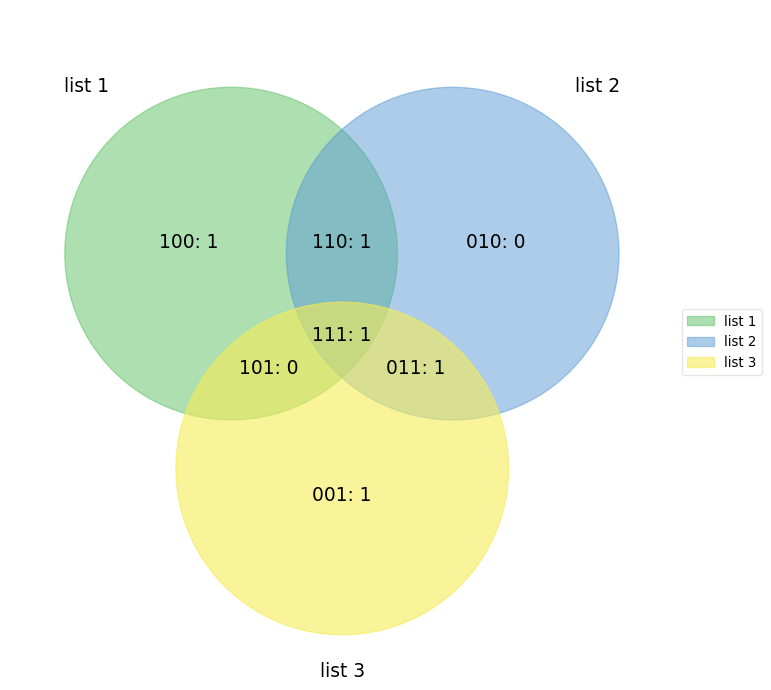

In [23]:
labels = venn.get_labels([['A', 'B', 'C'], ['B', 'C', 'D'], ['D', 'B', 'E']], fill=['number', 'logic'])
fig, ax = venn.venn3(labels, names=['list 1', 'list 2', 'list 3', 'list 4'])
fig.show()